In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

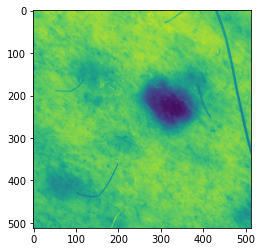

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

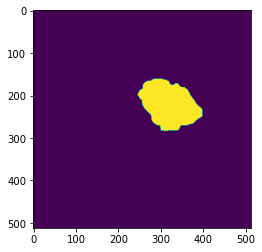

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpz45pt_i6kuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpz45pt_i6kuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 1

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 37s 694ms/step - loss: 0.5583 - dice_coeff: 0.3025 - val_loss: 0.5379 - val_dice_coeff: 0.3310
Epoch 2/100
39/39 [==============================] - 19s 489ms/step - loss: 0.4933 - dice_coeff: 0.3478 - val_loss: 0.4488 - val_dice_coeff: 0.4291
Epoch 3/100
39/39 [==============================] - 19s 489ms/step - loss: 0.4434 - dice_coeff: 0.4720 - val_loss: 0.4250 - val_dice_coeff: 0.4811
Epoch 4/100
39/39 [==============================] - 20s 507ms/step - loss: 0.4117 - dice_coeff: 0.5135 - val_loss: 0.3947 - val_dice_coeff: 0.5512
Epoch 5/100
39/39 [==============================] - 19s 494ms/step - loss: 0.4134 - dice_coeff: 0.5267 - val_loss: 0.3888 - val_dice_coeff: 0.5557
Epoch 6/100
39/39 [==============================] - 19s 484ms/step - loss: 0.4006 - dice_coeff: 0.5409 - val_loss: 0.3918 - val_dice_coeff: 0.5583
Epoch 7/100
39/39 [==============================] - 19s 488ms/step - loss: 0.3809 - dice_coeff: 0.55

In [17]:
# with only 1 run there is nothing to plot so a plot is not included for the case of 1 run

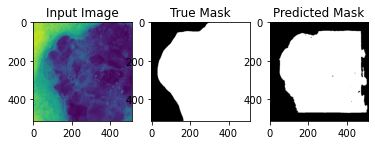

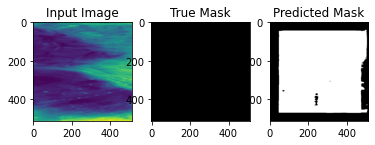

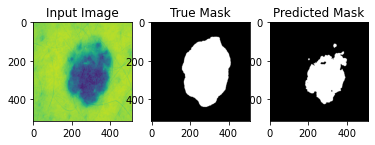

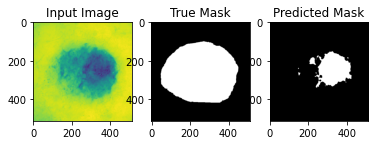

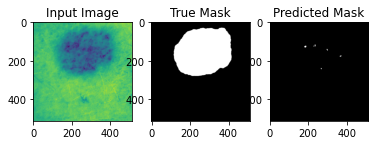

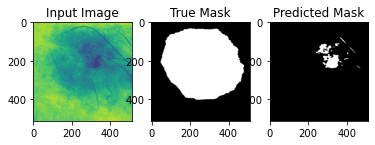

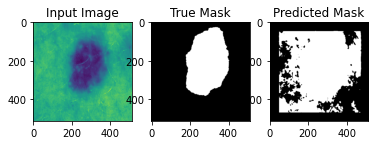

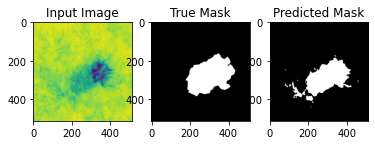

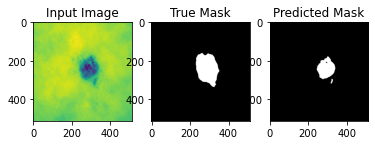

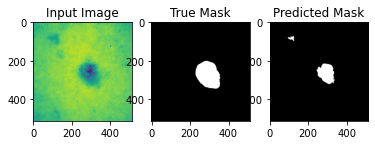

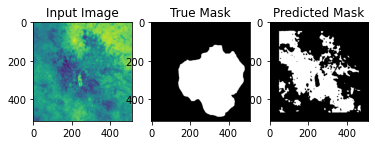

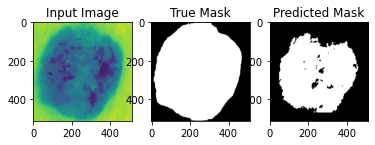

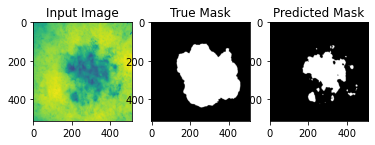

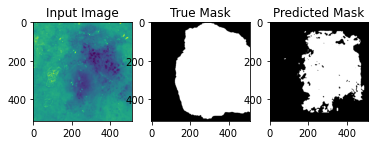

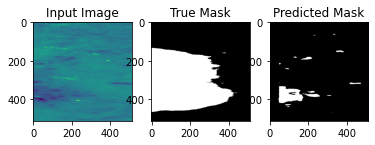

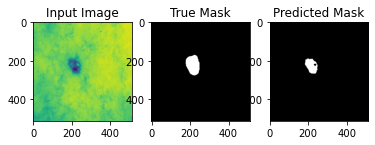

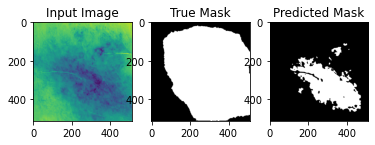

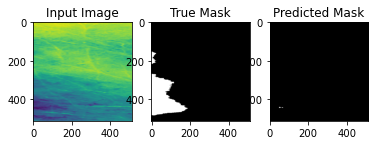

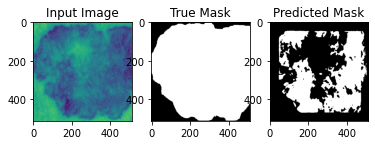

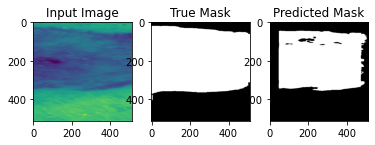

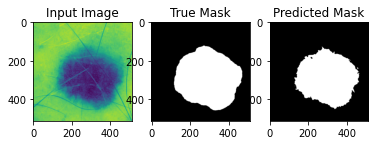

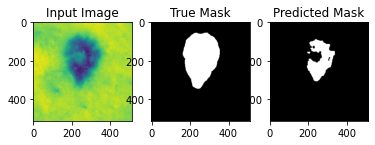

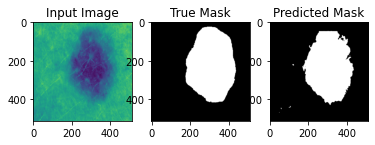

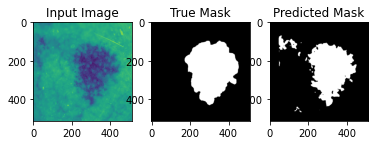

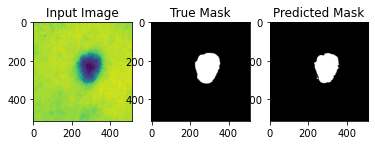

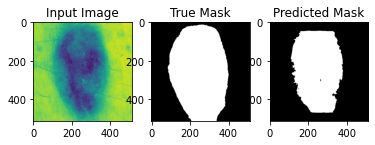

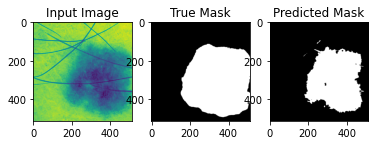

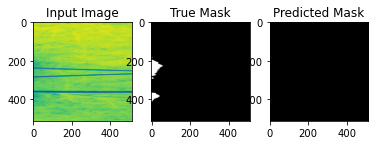

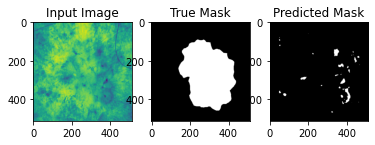

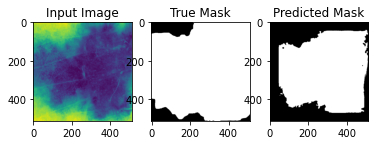

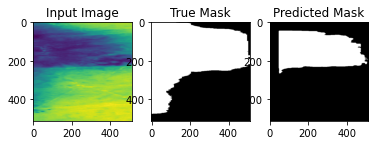

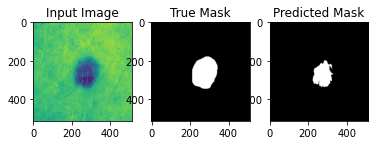

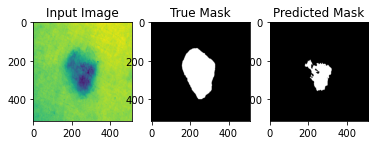

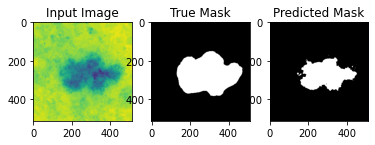

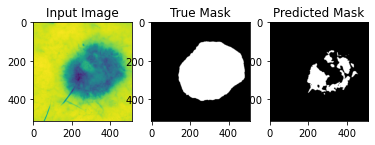

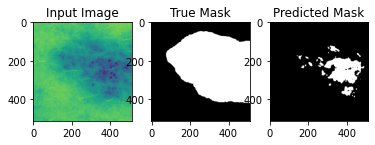

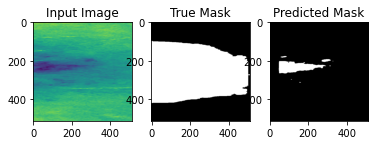

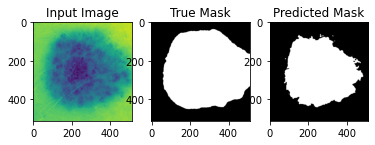

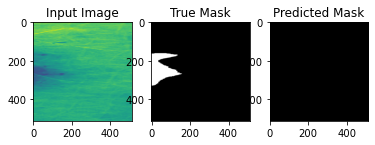

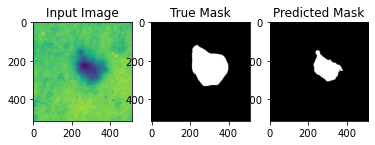

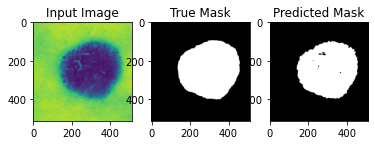

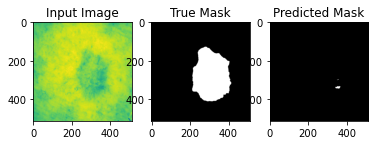

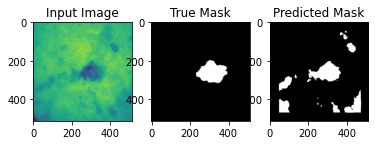

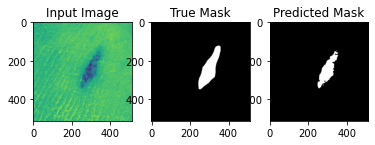

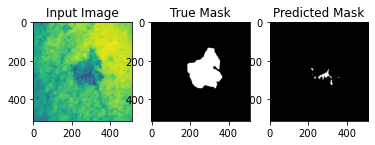

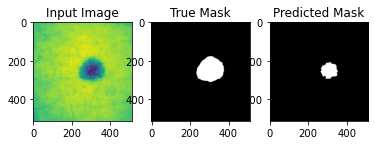

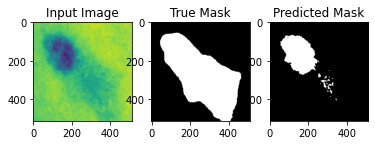

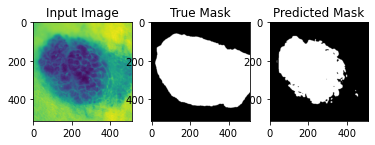

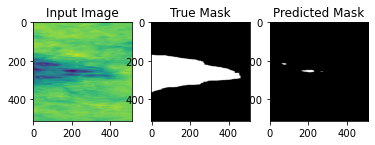

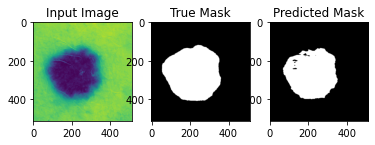

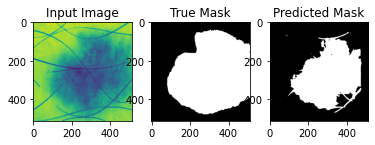

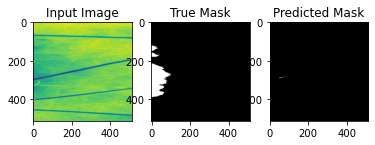

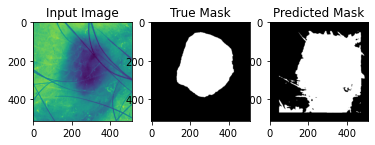

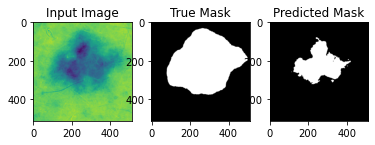

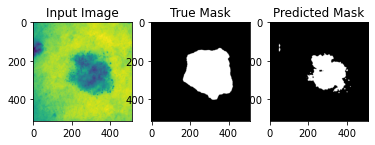

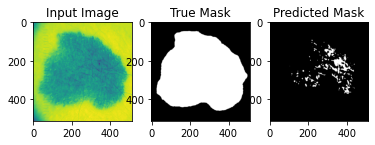

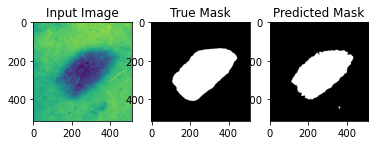

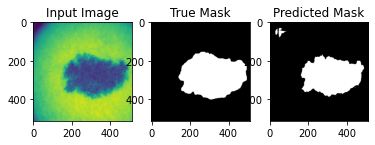

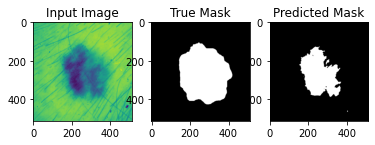

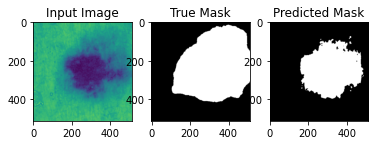

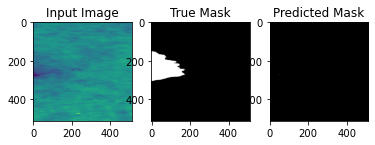

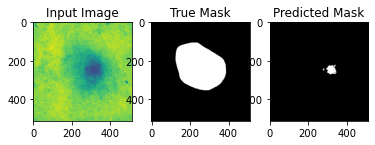

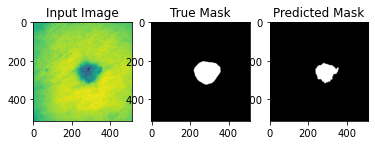

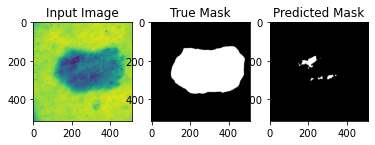

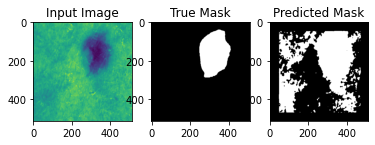

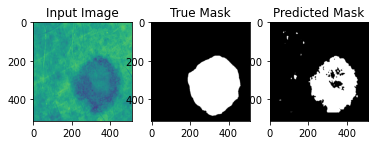

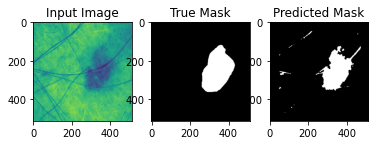

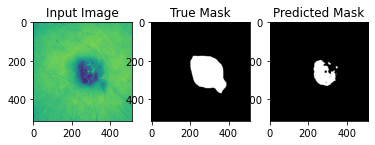

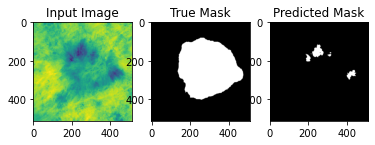

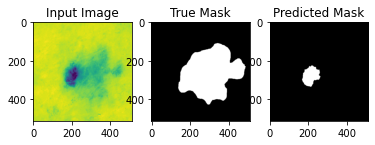

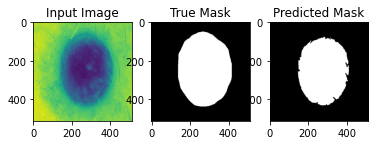

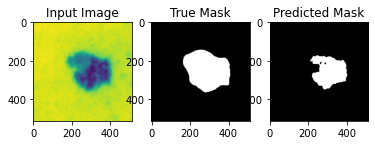

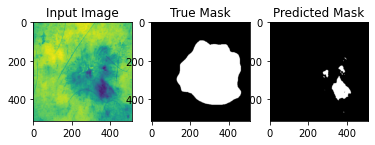

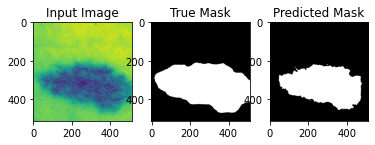

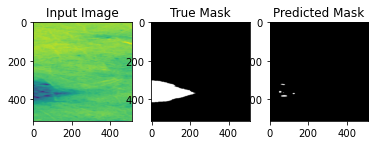

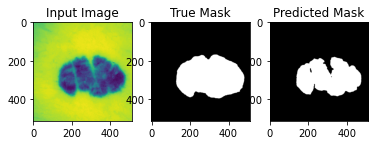

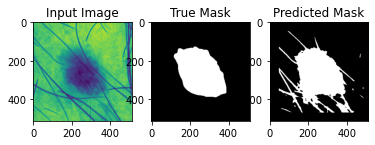

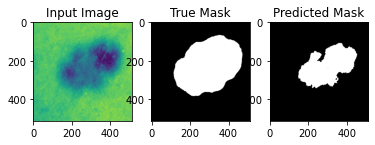

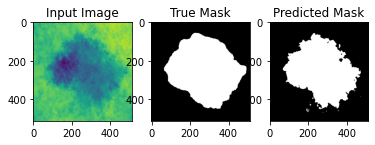

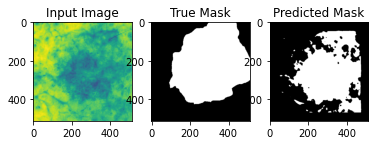

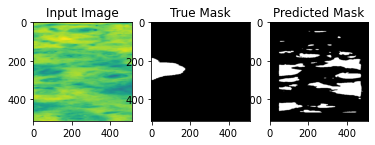

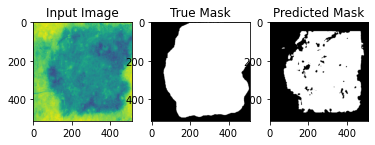

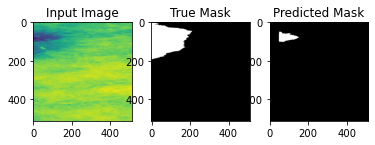

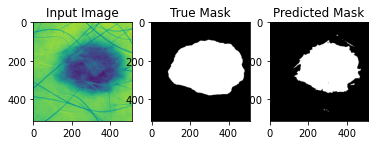

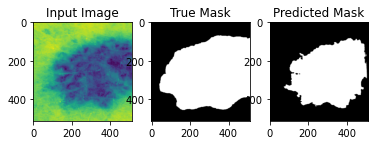

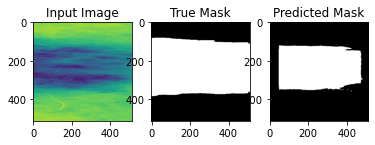

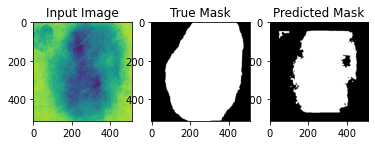

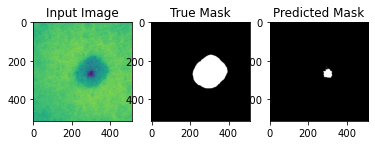

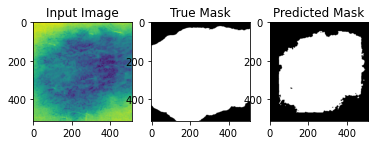

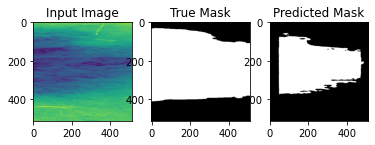

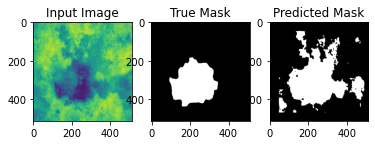

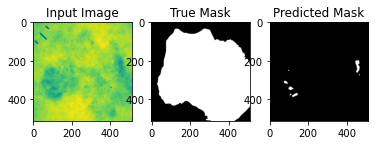

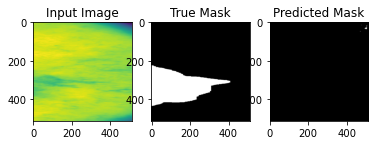

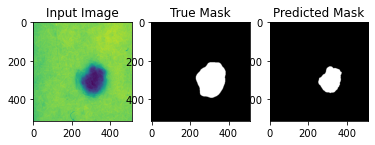

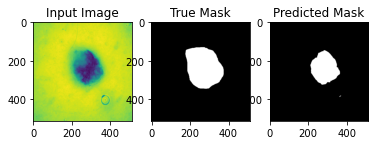

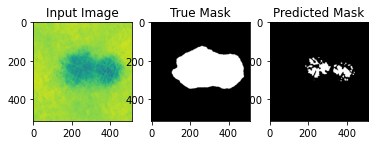

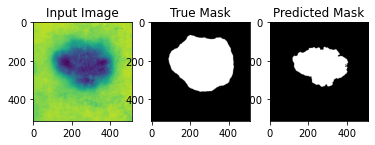

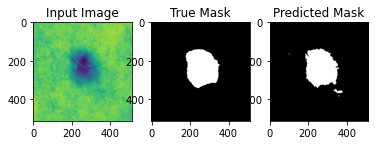

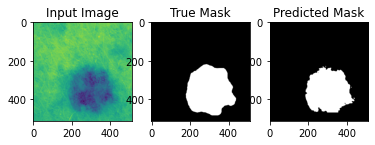

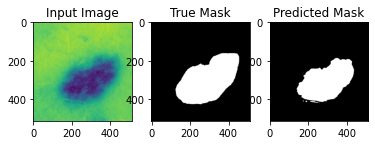

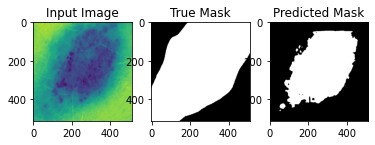

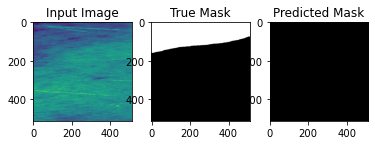

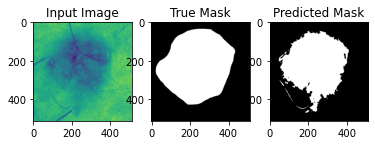

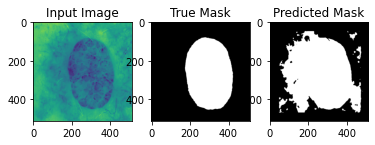

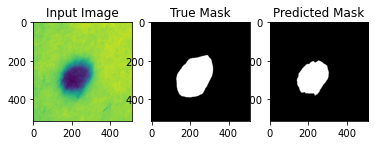

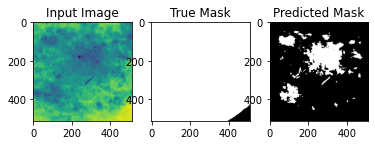

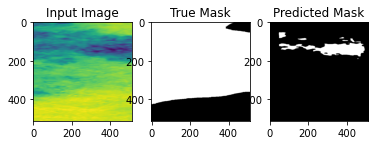

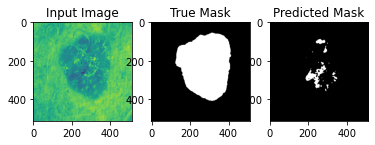

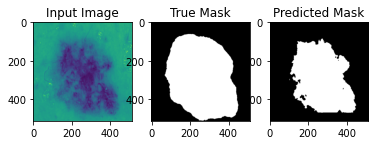

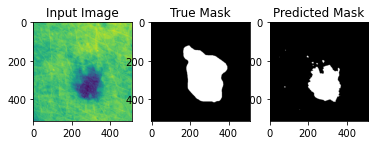

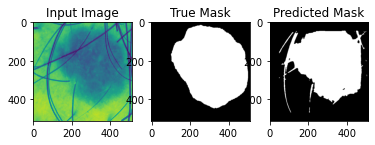

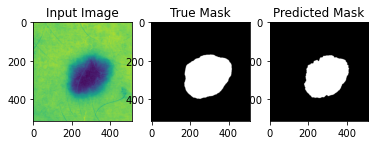

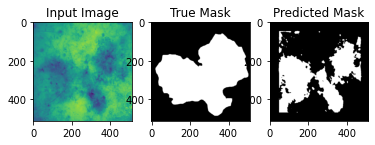

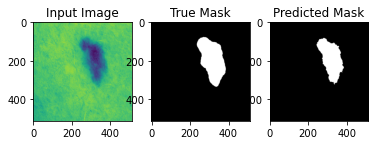

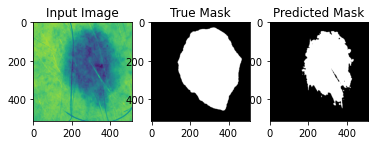

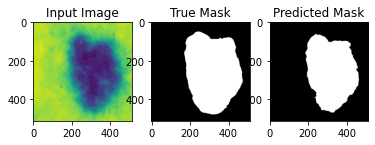

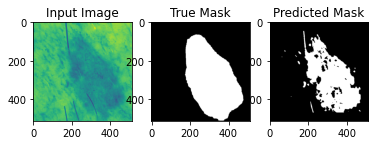

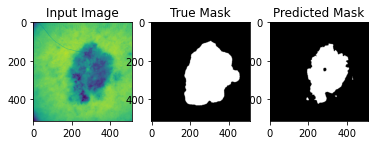

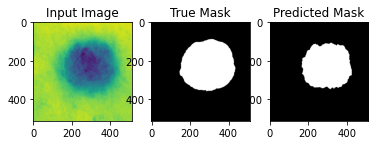

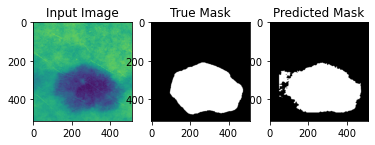

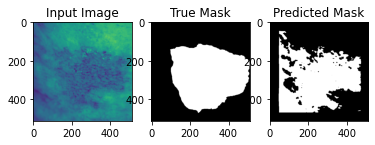

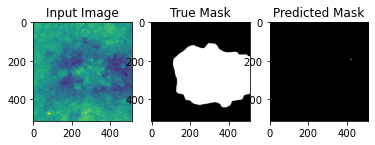

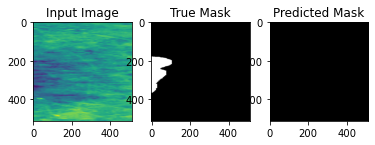

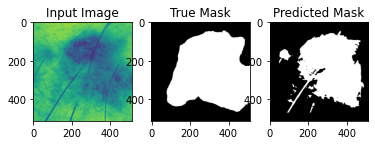

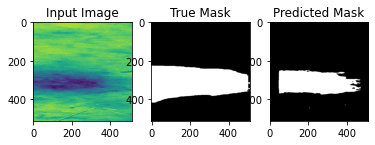

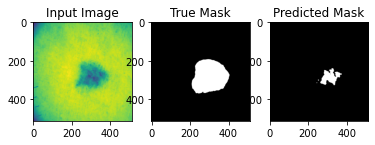

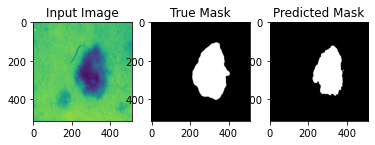

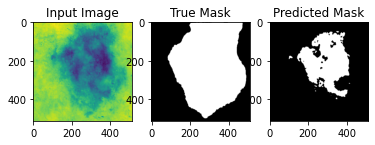

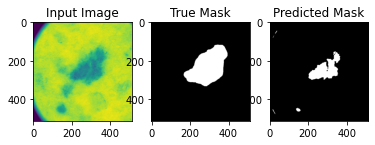

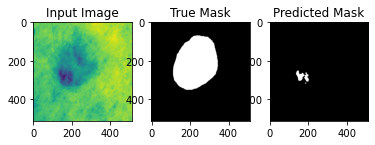

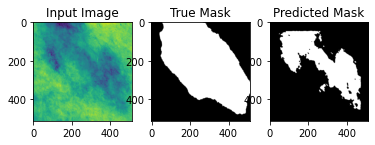

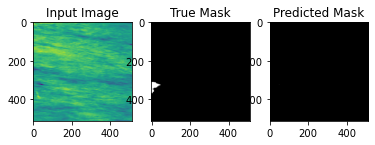

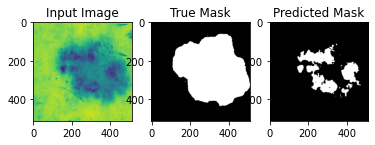

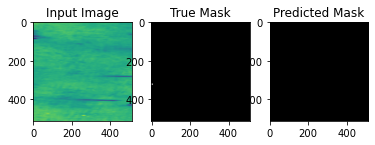

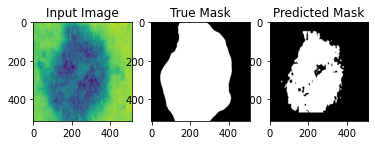

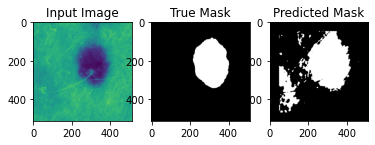

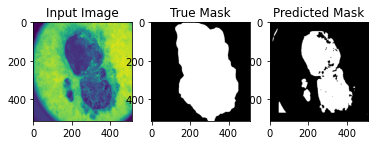

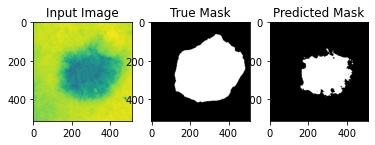

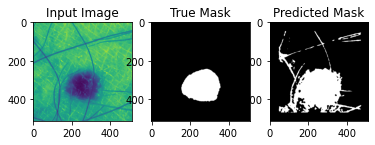

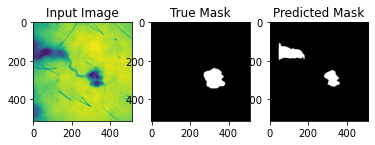

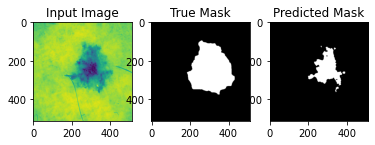

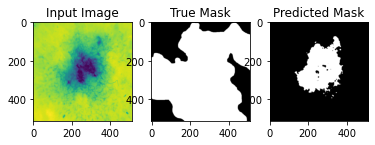

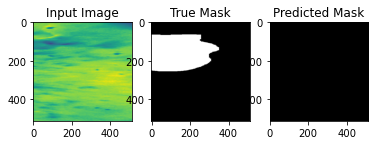

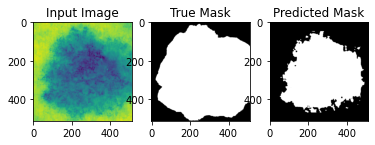

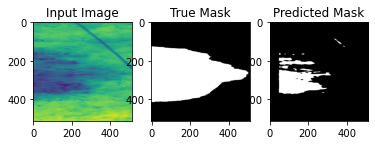

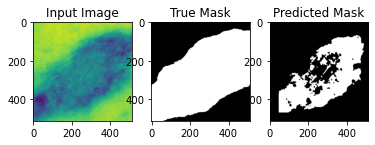

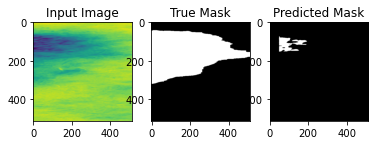

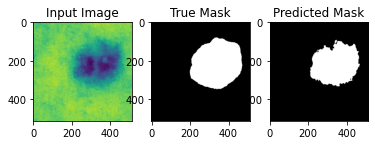

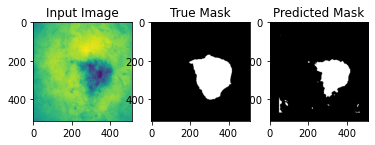

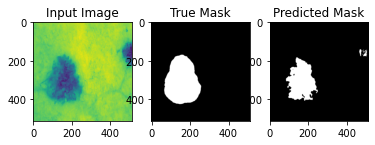

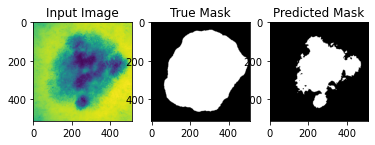

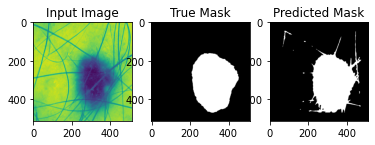

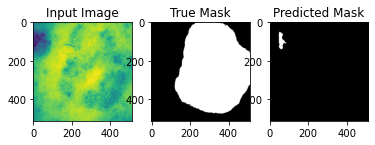

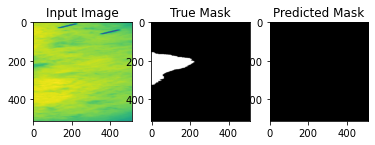

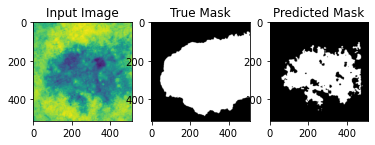

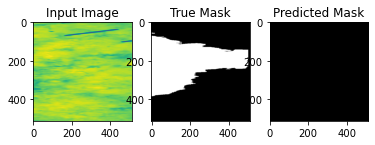

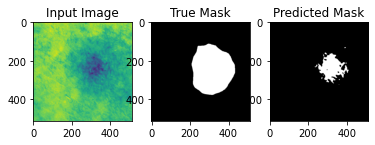

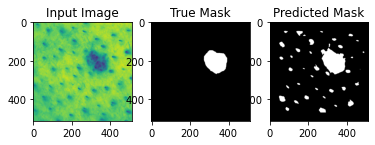

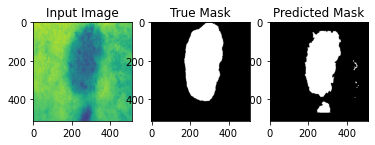

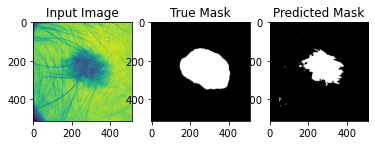

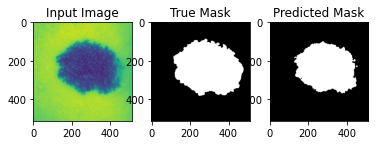

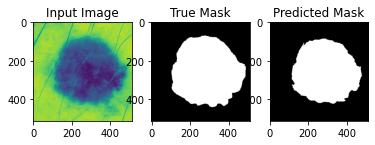

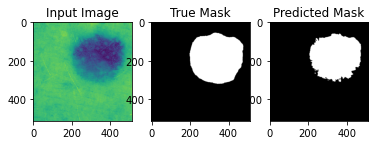

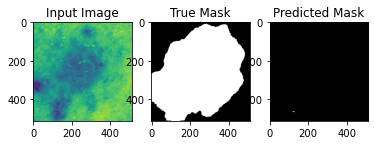

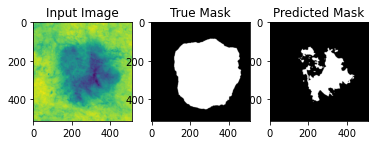

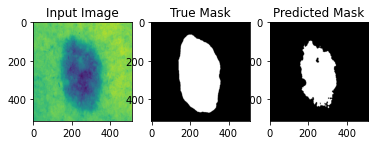

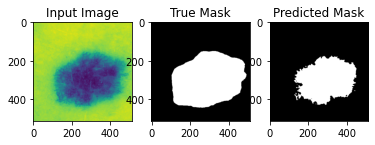

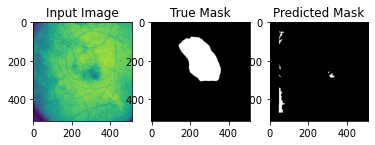

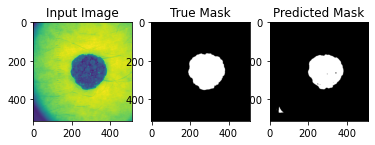

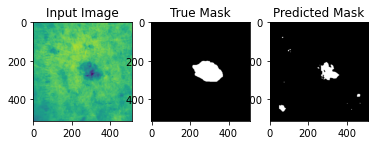

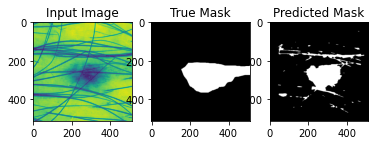

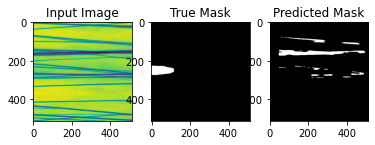

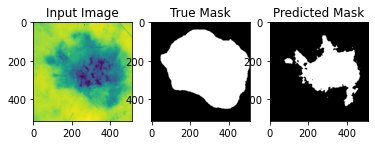

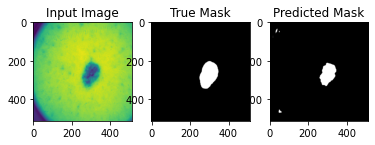

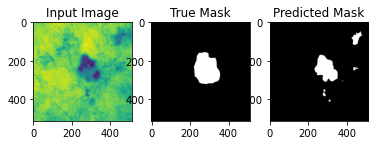

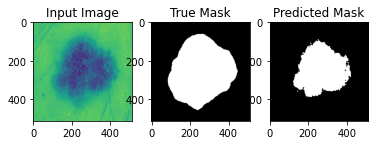

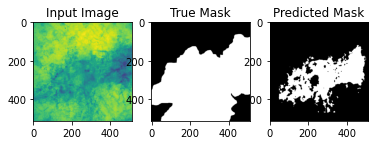

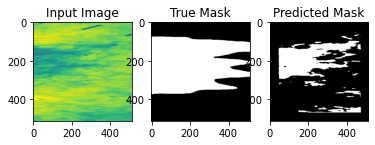

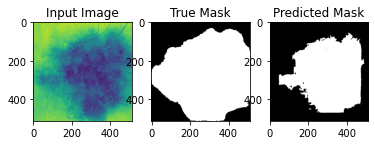

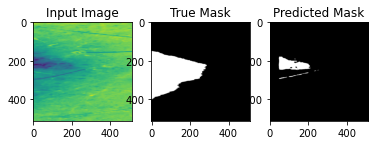

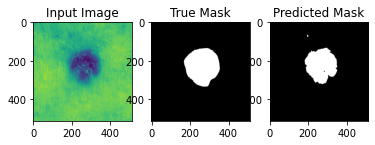

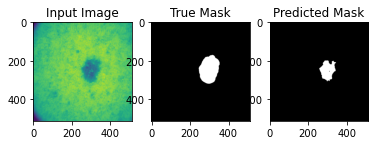

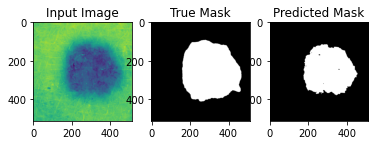

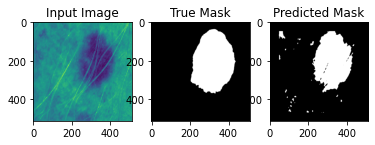

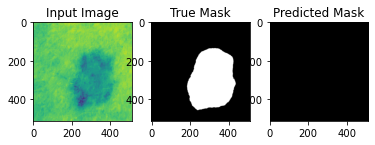

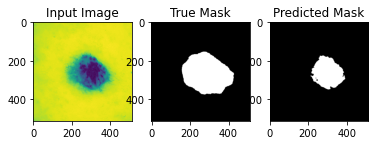

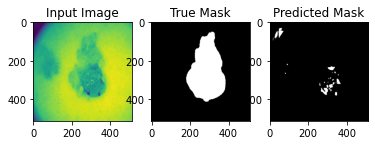

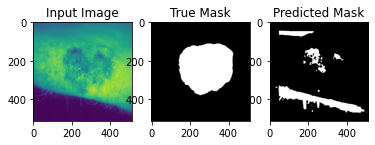

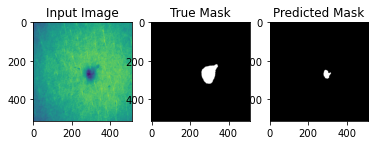

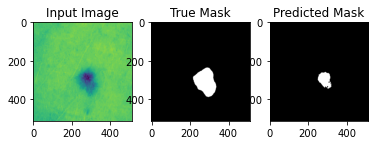

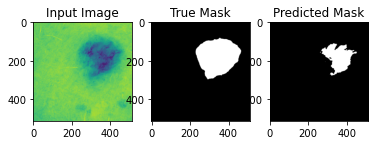

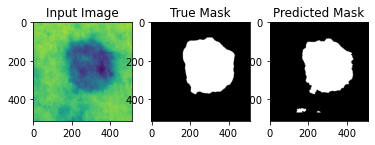

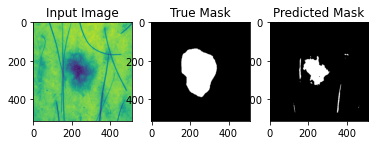

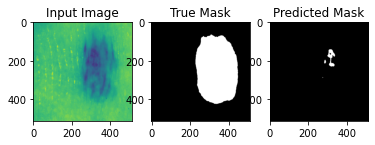

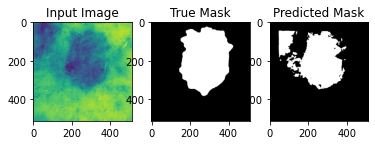

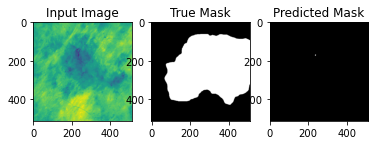

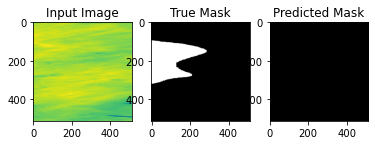

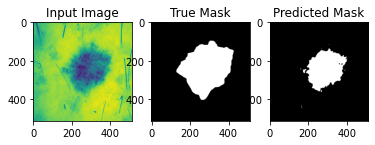

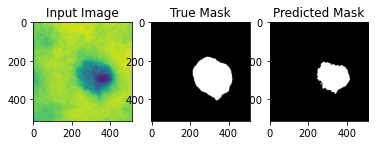

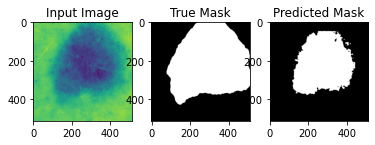

In [18]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=200) # after 1 runs of GP2